In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM

from ml_model.data_generation import uterus


In [2]:
num = 100000
uterus_data = uterus(num)
uterus_data.add_noise()
x = uterus_data.x
y = uterus_data.y



/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: divide by zero encountered in true_divide
  exptTp=np.exp(-1*t/Tp)
/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: invalid value encountered in true_divide
  exptTp=np.exp(-1*t/Tp)


92199  :  [0.99617263 0.23168871 0.98832427]
nan:  []
>100:  [91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807
 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807
 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807
 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807 91807
 91807 91807 91807]
x shape:  (99608, 150)
Synth max, min, mean:  138.52757659247138 -0.11424100364705847 0.3372259496012742
Synth noise max, min, mean:  146.43830062086502 -9.180243068529464 0.3372192373788893


In [3]:
E = y[:,0]
E_over = E[E > 0]
E_over.shape

(99608,)

In [4]:
x.shape, y.shape

((99608, 150), (99608, 3))

In [5]:
t = np.arange(0,366,2.45)



47578  :  [0.14751093 0.0074828  0.33784629]


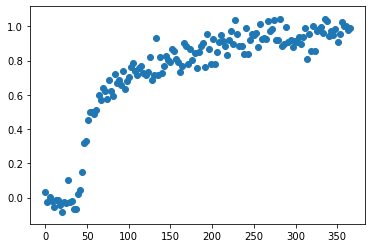

In [6]:
i = np.random.randint(low=0, high=x.shape[0])
plt.scatter(t, x[i])
print(i, ' : ',y[i])

In [7]:
x_real = uterus_data.real_x
y_real = uterus_data.real_y

1297  :  [0.         0.00755542 0.65      ]


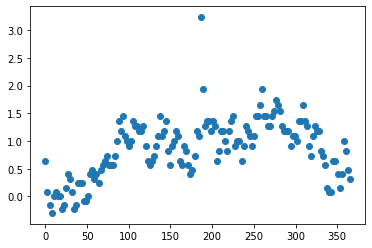

In [8]:
i = np.random.randint(low=0, high=x_real.shape[0])
plt.scatter(t, x_real[i])
print(i, ' : ',y_real[i])


 real  30685  :  [0.00129026 0.00170222 0.1       ]
(140, 3)

 gen  74  :  [0.00177048 0.00203923 0.10897071]


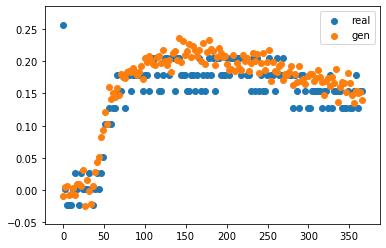

In [9]:
i = np.random.randint(low=0, high=x_real.shape[0])
plt.scatter(t, x_real[i], label = 'real')
print('\n real ', i, ' : ',y_real[i])
filter_y = y[(abs(y[:,0] - y_real[i,0]) < 0.01) & (abs(y[:,1] - y_real[i,1]) < 0.001) & (abs(y[:,2] - y_real[i,2]) < 0.01)  ]
filter_x = x[(abs(y[:,0] - y_real[i,0]) < 0.01) & (abs(y[:,1] - y_real[i,1]) < 0.001) & (abs(y[:,2] - y_real[i,2]) < 0.01)  ]

print(filter_y.shape)
if filter_y.shape[0] != 0:
    i = np.random.randint(low=0, high=filter_y.shape[0])

    plt.scatter(t, filter_x[i], label='gen')
    print('\n gen ', i, ' : ',filter_y[i])
    plt.legend()
    plt.show()

else:
    print('none within range, soooooorrrry')

In [10]:
train, val, test = uterus_data.create_mixed_data(64,1024,True)

1 :  []
x shape:  (99608, 150)
Synth max, min, mean:  146.43830062086502 -9.180243068529464 0.3372192373788893
Synth noise max, min, mean:  151.03582582595809 -12.525369768077816 0.33723231081750527
1 :  []


In [11]:
for i, (test_x, test_y) in enumerate(train):


    #loop through and combine all the batches into one whole
    if i == 0:
        full_test = test_x
    else:
        full_test = np.concatenate((full_test, test_x))



(106949, 150) [ 12695  92198  25733 103642  92218  14641  91919  48492  14641   7874
 100530  90285  90285   7874 100530  72455 103726 103726 100530 103726
  26762  14641 100530  48492 100530  14641  14641 100530 100530  14641
  25619  25619  25619  25619  48492  25619 100530 100530  25619  25619
  48492  48492  48492  48492  90285  48492  48492  90285  48492  48492
  48492  48492  90285  90285  90285  48492  90285  90285 100530 100530
  90285  90285  48492  90285  48492  90285  90285  90285 100530  48492
  48492 103642 103642 103642 103642  48492  48492  48492  48492  48492
  48492 100530  48492 100530 100530  12695 100530  12695 100530 100530
  48492  48492 103642  48492  14641 103642 103642  14641 103642 100530
 103642 100530 103726  12695 103642 103726  14641  14641  14641 103726
  12695 103642  12695 103642 103726 103642  83864  83864 103642 103726
   7874 103642 103642 103642  83864  14641  12695   7874 100530 100530
  12695  19492 103726 103726  19492  19492  19492 100530 100530

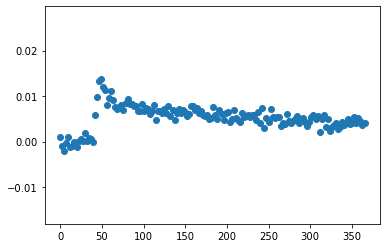

In [12]:
print(full_test.shape, full_test.argmax(axis = 0), full_test.argmin())

plt.scatter(t, full_test[1914])
print(full_test[1914,:])

In [15]:
new_x = uterus_data.x

53564


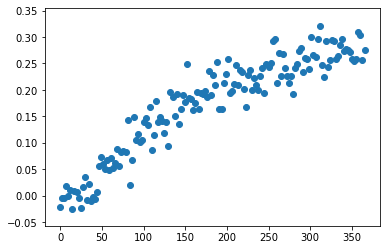

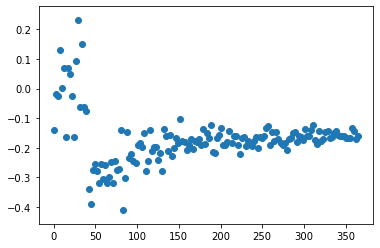

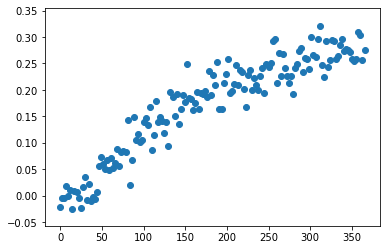

<Figure size 432x288 with 0 Axes>

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
i = np.random.randint(0, new_x.shape[0])
print(i)
scaler = StandardScaler()

scaler.fit(new_x)
scaled_x = scaler.transform(new_x)

plt.scatter(t, new_x[i])
plt.show()
plt.clf()

plt.scatter(t, scaled_x[i])
plt.show()
plt.clf()

old_x = scaler.inverse_transform(scaled_x)

plt.scatter(t, old_x[i])
plt.show()
plt.clf()

In [ ]:
i = np.random.randint(0, scaled_x.T.shape[0])
plt.scatter(t, scaled_x.T[i])
plt.show()
plt.clf()

In [ ]:
import